In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image library in python
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_url='https://drive.google.com/file/d/1SsYzyh74jzdaBkvvZKeqIJTAFCYhmsm9/view?usp=drive_link'
data_dir = tf.keras.utils.get_file('dataset', origin=dataset_url,  cache_dir='.', untar=True)

<ipython-input-127-48f7c90b5b7a>:2: UserWarning: Could not extract archive.
  data_dir = tf.keras.utils.get_file('dataset', origin=dataset_url,  cache_dir='.', untar=True)


In [ ]:
!tar -xvzf /content/drive/MyDrive/dataSet.tgz -C /content/datasets

Streaming output truncated to the last 5000 lines.
./dataSet/S/116.jpg
./dataSet/S/117.jpg
./dataSet/S/118.jpg
./dataSet/S/119.jpg
./dataSet/S/12.jpg
./dataSet/S/120.jpg
./dataSet/S/121.jpg
./dataSet/S/122.jpg
./dataSet/S/123.jpg
./dataSet/S/124.jpg
./dataSet/S/125.jpg
./dataSet/S/126.jpg
./dataSet/S/127.jpg
./dataSet/S/128.jpg
./dataSet/S/129.jpg
./dataSet/S/13.jpg
./dataSet/S/130.jpg
./dataSet/S/131.jpg
./dataSet/S/132.jpg
./dataSet/S/133.jpg
./dataSet/S/134.jpg
./dataSet/S/135.jpg
./dataSet/S/136.jpg
./dataSet/S/137.jpg
./dataSet/S/138.jpg
./dataSet/S/139.jpg
./dataSet/S/14.jpg
./dataSet/S/140.jpg
./dataSet/S/141.jpg
./dataSet/S/142.jpg
./dataSet/S/143.jpg
./dataSet/S/144.jpg
./dataSet/S/145.jpg
./dataSet/S/146.jpg
./dataSet/S/147.jpg
./dataSet/S/148.jpg
./dataSet/S/149.jpg
./dataSet/S/15.jpg
./dataSet/S/150.jpg
./dataSet/S/151.jpg
./dataSet/S/152.jpg
./dataSet/S/153.jpg
./dataSet/S/154.jpg
./dataSet/S/155.jpg
./dataSet/S/156.jpg
./dataSet/S/157.jpg
./dataSet/S/158.jpg
./dataSet/S/1

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/datasets/dataSet')
data_dir

PosixPath('/content/datasets/dataSet')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/datasets/dataSet/M/159.jpg'),
 PosixPath('/content/datasets/dataSet/M/498.jpg'),
 PosixPath('/content/datasets/dataSet/M/301.jpg'),
 PosixPath('/content/datasets/dataSet/M/41.jpg'),
 PosixPath('/content/datasets/dataSet/M/645.jpg')]

In [ ]:
letter_image_dict={
    '0':list(data_dir.glob('0/*')),
    'A':list(data_dir.glob('A/*')),
    'B':list(data_dir.glob('B/*')),
    'C':list(data_dir.glob('C/*')),
    'D':list(data_dir.glob('D/*')),
    'E':list(data_dir.glob('E/*')),
    'F':list(data_dir.glob('F/*')),
    'G':list(data_dir.glob('G/*')),
    'H':list(data_dir.glob('H/*')),
    'I':list(data_dir.glob('I/*')),
    'J':list(data_dir.glob('J/*')),
    'K':list(data_dir.glob('K/*')),
    'L':list(data_dir.glob('L/*')),
    'M':list(data_dir.glob('M/*')),
    'N':list(data_dir.glob('N/*')),
    'O':list(data_dir.glob('O/*')),
    'P':list(data_dir.glob('P/*')),
    'Q':list(data_dir.glob('Q/*')),
    'R':list(data_dir.glob('R/*')),
    'S':list(data_dir.glob('S/*')),
    'T':list(data_dir.glob('T/*')),
    'U':list(data_dir.glob('U/*')),
    'V':list(data_dir.glob('V/*')),
    'W':list(data_dir.glob('W/*')),
    'X':list(data_dir.glob('X/*')),
    'Y':list(data_dir.glob('Y/*')),
    'Z':list(data_dir.glob('Z/*'))
}

In [ ]:
letter_label_dict={
    '0':0,
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'H':8,
    'I':9,
    'J':10,
    'K':11,
    'L':12,
    'M':13,
    'N':14,
    'O':15,
    'P':16,
    'Q':17,
    'R':18,
    'S':19,
    'T':20,
    'U':21,
    'V':22,
    'W':23,
    'X':24,
    'Y':25,
    'Z':26
}

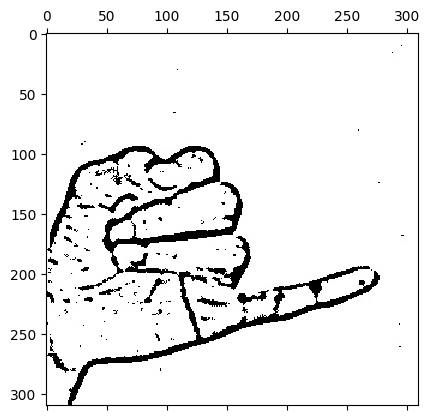

In [ ]:
img=cv2.imread(str(letter_image_dict['J'][60]))
plt.matshow(img)

In [ ]:
img.shape

(310, 310, 3)

In [ ]:
# x, y = [], []
# for labels, images in letter_image_dict.items():
#     for image_path in images: # Iterate over image paths
#         #image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE) # Load the image
#         image = cv2.imread(str(image_path))
#         image = cv2.resize(image, (180, 180)) # Resize the image
#         x.append(image)
#         y.append(letter_label_dict[labels])


In [ ]:
import time
import numpy as np

# Example for measuring training time
start_time = time.time()

# data preprocessing
x, y = [], []
for labels, images in letter_image_dict.items():
    for image_path in images: # Iterate over image paths
        #image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE) # Load the image
        image = cv2.imread(str(image_path))
        image = cv2.resize(image, (180, 180)) # Resize the image
        x.append(image)
        y.append(letter_label_dict[labels])

end_time = time.time()
preprocessing_time = end_time - start_time
print(f"Data preprocessing: {preprocessing_time} seconds")

Data preprocessing: 15.870087385177612 seconds


In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x.shape

(17113, 180, 180, 3)

In [ ]:
from sklearn.model_selection import train_test_split                     #split  data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

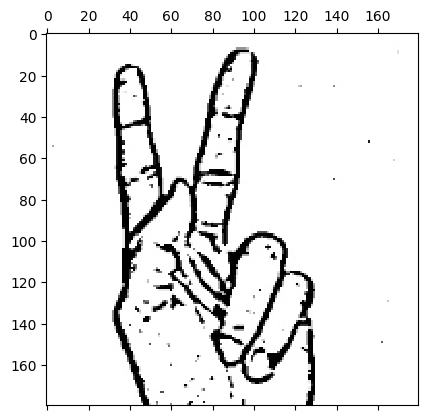

In [ ]:
plt.matshow(x_train[7])

In [ ]:
x_train_scaled=x_train                                          #normalization
x_test_scaled=x_test

In [ ]:
#CNN Classifier
num_classes=27
model=Sequential([
    layers.Conv2D(16,3,input_shape=(180,180,3),padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
start_time = time.time()
# Train the model
model.fit(x_train, y_train, epochs=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")


Epoch 1/2
428/428 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.7071 - loss: 18.8628
Epoch 2/2
428/428 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - accuracy: 0.9972 - loss: 0.0134
Training Time: 949.0084097385406 seconds


In [ ]:
# model.fit(x_train,y_train,epochs=2)

In [ ]:
# model evaluation
start_time = time.time()

# Train the model
model.evaluate(x_test,y_test)

end_time = time.time()
evaluation_time = end_time - start_time
print(f"Evaluation Time: {evaluation_time} seconds")

107/107 ━━━━━━━━━━━━━━━━━━━━ 35s 329ms/step - accuracy: 0.9930 - loss: 0.0189
Evaluation Time: 41.93424439430237 seconds


In [ ]:
# model.evaluate(x_test,y_test)

In [ ]:
# Measure prediction time
start_time = time.time()

# Make predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction Time: {prediction_time} seconds")


107/107 ━━━━━━━━━━━━━━━━━━━━ 35s 323ms/step
Prediction Time: 35.55836224555969 seconds


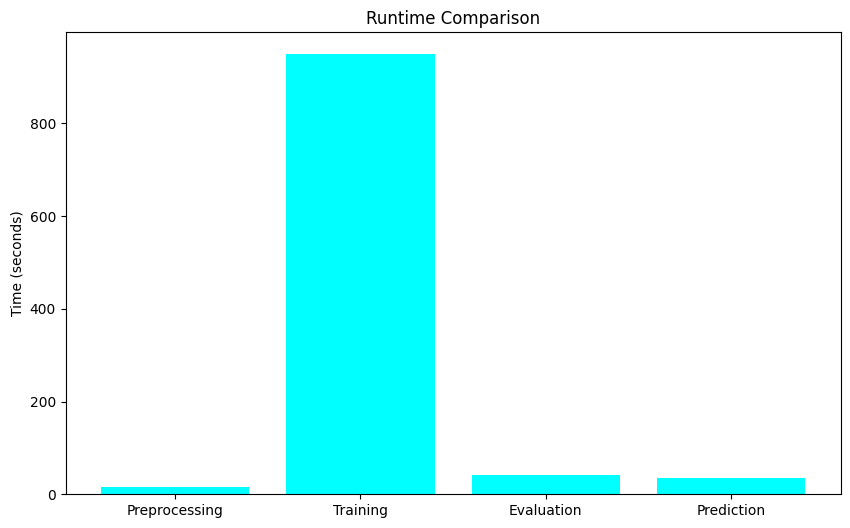

In [ ]:
# List of method names and their runtimes
methods = ['Preprocessing','Training','Evaluation','Prediction']
times = [preprocessing_time, training_time, evaluation_time, prediction_time]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(methods, times, color='cyan')
plt.ylabel('Time (seconds)')
plt.title('Runtime Comparison')
plt.show()

In [ ]:
# Create a DataFrame to display the runtimes
runtime_dict = {'Method': methods, 'Runtime (seconds)': times}
runtime_df = pd.DataFrame(runtime_dict)

# Display the DataFrame
print(runtime_df)

          Method  Runtime (seconds)
0  Preprocessing          15.870087
1       Training         949.008410
2     Evaluation          41.934244
3     Prediction          35.558362


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
mcc = matthews_corrcoef(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient (MCC): {mcc}")


107/107 ━━━━━━━━━━━━━━━━━━━━ 54s 502ms/step
Accuracy: 0.9956178790534619
Precision: 0.9955894619804563
Recall: 0.9958532863767123
F1 Score: 0.9956564999988139
Matthews Correlation Coefficient (MCC): 0.9954536880765076


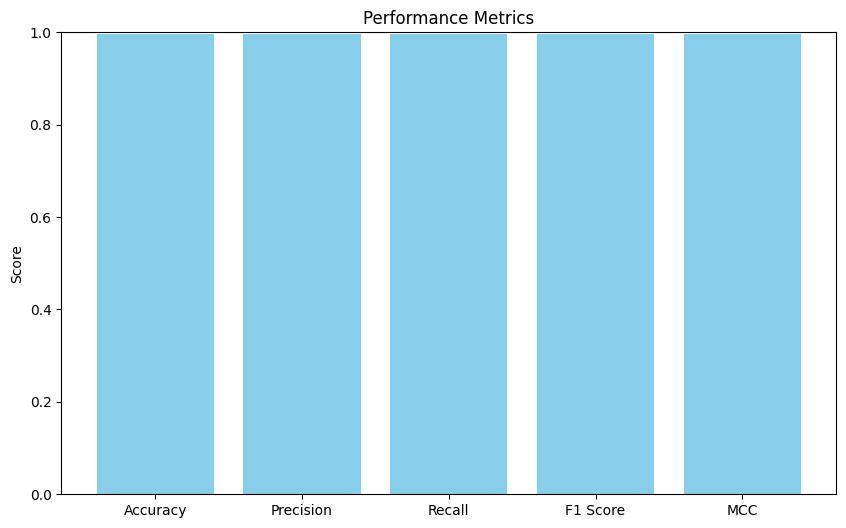

In [ ]:
# Create a list of metric names and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
values = [accuracy, precision, recall, f1, mcc]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.show()


In [ ]:

# Create a DataFrame to display the metrics
metrics_dict = {'Metric': metrics, 'Score': values}
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
print(metrics_df)


      Metric     Score
0   Accuracy  0.995618
1  Precision  0.995589
2     Recall  0.995853
3   F1 Score  0.995656
4        MCC  0.995454


In [ ]:
def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
             return key
    return "key doesn't exist"

In [ ]:
predicted=model.predict(x_test)
print(get_key(letter_label_dict,np.argmax(predicted[1])))

107/107 ━━━━━━━━━━━━━━━━━━━━ 36s 338ms/step
N


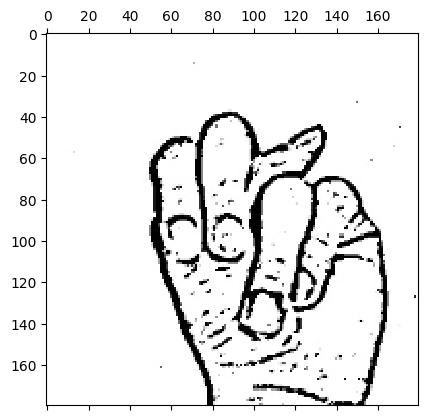

In [ ]:
plt.matshow(x_test[1])

In [ ]:
pip install gtts

In [ ]:
from gtts import gTTS
from IPython.display import Audio, display

In [ ]:
sign=1

N


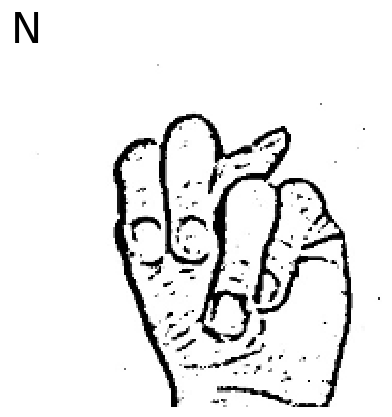

In [ ]:
print(get_key(letter_label_dict,np.argmax(predicted[sign])))
answer=get_key(letter_label_dict,np.argmax(predicted[sign]))
sou = gTTS(text=answer, lang='en', slow=False)
from PIL import Image
sou.save('sou.mp3')
audio = 'sou.mp3'
display(Audio(audio, autoplay=True))
plt.matshow(x_test[sign])
plt.axis('off')
plt.text(0,3,str(answer), size=30)
plt.show()

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      // Create the video element and flip it
      const video = document.createElement('video');
      video.style.display = 'block';
      video.style.transform = 'scaleX(-1)';  // Flip the video feed horizontally
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Define the ROI coordinates relative to the flipped video feed
      const roiWidth = 10;
      const roiHeight = 200;
      const x1 = video.videoWidth - (parseInt(0.3 * video.videoWidth) + roiWidth);  // Adjust for flip
      const y1 = 10;
      const x2 = video.videoWidth - 10;
      const y2 = y1 + roiHeight;

      // Create an overlay canvas for drawing the ROI
      const overlayCanvas = document.createElement('canvas');
      overlayCanvas.width = video.videoWidth;
      overlayCanvas.height = video.videoHeight;
      overlayCanvas.style.position = 'absolute';
      overlayCanvas.style.top = video.offsetTop + 'px';
      overlayCanvas.style.left = video.offsetLeft + 'px';
      div.appendChild(overlayCanvas);

      const overlayContext = overlayCanvas.getContext('2d');

      // Function to draw the ROI rectangle on the overlay canvas
      function drawROI() {
        overlayContext.clearRect(0, 0, overlayCanvas.width, overlayCanvas.height);

        overlayContext.strokeStyle = 'red';
        overlayContext.lineWidth = 2;
        overlayContext.strokeRect(x1, y1, x2 - x1, y2 - y1);

        requestAnimationFrame(drawROI);
      }

      // Start drawing the ROI
      drawROI();

      // Wait for the capture button to be clicked
      await new Promise((resolve) => capture.onclick = resolve);

      // Create a canvas for capturing the flipped video feed
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      const context = canvas.getContext('2d');

      // Flip the video feed back to normal orientation for capturing
      context.scale(-1, 1);  // Flip horizontally
      context.drawImage(video, -canvas.width, 0, canvas.width, canvas.height);

      // Extract ROI from the flipped video
      const roiData = context.getImageData(x1, y1, x2 - x1, y2 - y1);
      const roiCanvas = document.createElement('canvas');
      roiCanvas.width = roiData.width;
      roiCanvas.height = roiData.height;
      roiCanvas.getContext('2d').putImageData(roiData, 0, 0);

      // Stop the video stream and clean up
      stream.getVideoTracks()[0].stop();
      div.remove();
      return roiCanvas.toDataURL('image/jpeg', quality);
    }

    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  minValue = 70
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray,(5,5),2)
  th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
  ret, processed = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  processed_scaled=cv2.resize(processed,(180,180))
  cv2.imwrite(filename, processed_scaled)
  return filename

In [ ]:
def keep_going(n):
  cou=0
  try:
    filename = take_photo('photo.jpg')

  except Exception as err:
    print(str(err))
  a = cv2.imread('photo.jpg')
  a = a.astype('float32')
  a = np.expand_dims(a, axis=0)
  outcome=model.predict(a)
  b = cv2.imread('photo.jpg')
  t=get_key(letter_label_dict,np.argmax(outcome))
  if t=='0':
    t='Space'
  else:
    t=t
  sou = gTTS(t, lang='en', slow=False)
  from PIL import Image
  sou.save('sou.mp3')
  audio = 'sou.mp3'
  display(Audio(audio, autoplay=True))
  plt.matshow(b)
  plt.axis('off')
  plt.text(0,3,t, size=30)
  plt.show()
  lett=get_key(letter_label_dict,np.argmax(outcome))

  return lett


In [ ]:
word=[]

while True:
    c=input('Press enter to continue or 0 to exit ')
    if c=='0':
      break
      print(str(word))
    elif c=='':
      n = keep_going(c)
      if n=='0':
        n=' '
      else:
        n=n
      word.append(n)
    else:
      print('Wrong key pressed. Try again. Press enter to continue or 0 to exit ')

Press enter to continue or 0 to exit 0


In [ ]:
w=word
wor=''
for m in w:
  wor=wor+m
print(wor)



In [ ]:
so = gTTS(wor, lang='en', slow=False)
so.save('so.mp3')
audi = 'so.mp3'
display(Audio(audi, autoplay=True))

AssertionError: No text to speak